# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [20]:
dataset_train = pd.read_csv(r'C:\Users\Administrator\Desktop\udemy -deep learning\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Train.csv')
##  trainin set on which rnn - lstm will trin - select right column - numpy array of one column for that we need to 
#insert index location in range where nex 2 will be ecludeded and use .values to create numpy array
training_set = dataset_train.iloc[:, 1:2].values

In [21]:
type(training_set)

numpy.ndarray

In [22]:
training_set[1:5]

array([[331.27],
       [329.83],
       [328.34],
       [322.04]])

### Feature Scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [24]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [26]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

### Reshaping

In [27]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [29]:
##regressor - since predict cont. o/p ,  is object of sequential class
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [30]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [31]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [32]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [33]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [34]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [35]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [36]:
regressor.fit(X_train, y_train, epochs = 5, batch_size = 32)

Epoch 1/5
38/38 [==============================] - 11s 71ms/step - loss: 0.0971
Epoch 2/5
38/38 [==============================] - 3s 69ms/step - loss: 0.0055
Epoch 3/5
38/38 [==============================] - 2s 65ms/step - loss: 0.0068
Epoch 4/5
38/38 [==============================] - 2s 66ms/step - loss: 0.0053
Epoch 5/5
38/38 [==============================] - 2s 65ms/step - loss: 0.0057


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [38]:
dataset_test = pd.read_csv(r'C:\Users\Administrator\Desktop\udemy -deep learning\Part 3 - Recurrent Neural Networks\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [39]:
real_stock_price[1:5]

array([[788.36],
       [786.08],
       [795.26],
       [806.4 ]])

### Getting the predicted stock price of 2017

In [40]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualising the results

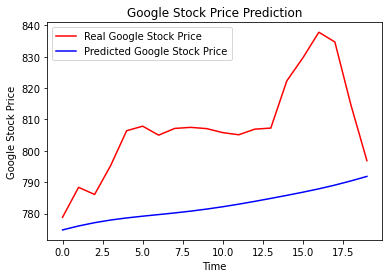

In [41]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()